# Gun Violence Trends from 2014 - 2023

The original data on mass shootings is from the [Gun Violence Archive](https://www.gunviolencearchive.org/), and the compiled dataset is from [figshare](https://figshare.com/articles/dataset/Gun_Violence/14552136).

This analysis will be using the compiled dataset which contains minimal differences from the original data. The only difference is the date variable has been split into year, month, and day. 

In [2]:
# use libraries for use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# import the csv into the notebook
shootings = pd.read_csv('data/mass-shootings-2014-2023.csv')
shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4683 entries, 0 to 4682
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Incident_ID                4683 non-null   int64  
 1   Incident_Date              4683 non-null   object 
 2   Incident_Time              3387 non-null   object 
 3   State_Name                 4683 non-null   object 
 4   City_or_County             4683 non-null   object 
 5   Business_or_Location_Name  1628 non-null   object 
 6   Address                    4668 non-null   object 
 7   Latitude                   4683 non-null   float64
 8   Longitude                  4683 non-null   float64
 9   Victims_Killed             4683 non-null   int64  
 10  Victims_Injured            4683 non-null   int64  
 11  Suspects_Killed            4683 non-null   int64  
 12  Suspects_Injured           4683 non-null   int64  
 13  Suspects_Arrested          4683 non-null   int64

In [4]:
print(shootings.columns)

Index(['Incident_ID', 'Incident_Date', 'Incident_Time', 'State_Name',
       'City_or_County', 'Business_or_Location_Name', 'Address', 'Latitude',
       'Longitude', 'Victims_Killed', 'Victims_Injured', 'Suspects_Killed',
       'Suspects_Injured', 'Suspects_Arrested', 'Incident_Characteristics',
       'Year', 'Month', 'Day'],
      dtype='object')


## Exploratory Data Analysis

Aftering setting up the libraries and importing the data, it's time to perform some descriptive statistics and get a high-level view of the shape of the data. 

In [5]:
# get the sum of the victims killed by year
shootings.head()


,Incident_ID,Incident_Date,Incident_Time,State_Name,City_or_County,Business_or_Location_Name,Address,Latitude,Longitude,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested,Incident_Characteristics,Year,Month,Day
0,2790854,2023-12-31,12:30 AM,California,Hawthorne,Crenrose Plaza,14125 Crenshaw Blvd,33.9025,-118.3270,1,5,0,0,0,"Shot - Wounded/Injured\r\nShot - Dead (murder,...",2023,12,31
1,2791696,2023-12-31,11:12 PM,South Carolina,Little River,Drinking Class Sports Bar and Grille,3389 Hwy 9 E,33.8728,-78.6738,2,2,0,0,0,"Shot - Wounded/Injured\r\nShot - Dead (murder,...",2023,12,31
2,2791341,2023-12-31,11:30 PM,North Carolina,Charlotte,Romare Bearden Park,300 S Church St,35.2269,-80.8474,0,5,0,0,1,Shot - Wounded/Injured\r\nMass Shooting (4+ vi...,2023,12,31
3,2790081,2023-12-30,1:30 AM,Colorado,Denver,The Viking,4888 W Colfax Ave,39.7402,-105.0500,2,2,0,0,0,"Shot - Wounded/Injured\r\nShot - Dead (murder,...",2023,12,30
4,2790633,2023-12-30,11:33 PM,Texas,Beaumont,NaN,6500 block of Bigner Rd,30.1409,-94.1340,1,4,0,0,0,"Shot - Wounded/Injured\r\nShot - Dead (murder,...",2023,12,30


In [6]:
# making sure total victims is a minimum of four
shootings[['Victims_Injured', 'Victims_Killed']].describe()

,Victims_Injured,Victims_Killed
count,4683.000000,4683.000000
mean,4.134743,1.010890
std,6.778329,1.856701
min,0.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,1.000000
75%,5.000000,1.000000
max,439.000000,60.000000


In [7]:
shootings[['Victims_Injured', 'Victims_Killed']].var()

Victims_Injured    45.945745
Victims_Killed      3.447340
dtype: float64

In [8]:
# print frequency of incidents on year and month
print(shootings["Year"].value_counts())
print(shootings["Month"].value_counts())

Year
2021    690
2023    656
2022    644
2020    610
2019    414
2016    383
2017    347
2018    335
2015    332
2014    272
Name: count, dtype: int64
Month
7     596
6     549
8     483
5     459
9     424
10    410
4     356
11    338
1     275
12    270
3     268
2     255
Name: count, dtype: int64


In [9]:
# print frequency of incidents on year and month
print(shootings["State_Name"].value_counts().head())
print(shootings["City_or_County"].value_counts().head())
print(shootings["Business_or_Location_Name"].value_counts().head())

State_Name
Illinois        468
California      420
Texas           336
Florida         268
Pennsylvania    226
Name: count, dtype: int64
City_or_County
Chicago         340
Philadelphia    152
Baltimore        91
Houston          82
Washington       76
Name: count, dtype: int64
Business_or_Location_Name
7-Eleven              7
Waffle House          7
Walmart               6
McDonald's            4
West Garfield Park    3
Name: count, dtype: int64


## Feature Engineering

We've taken a look at what the data looks like. It might be a good idea to create a new set of features for this dataset that would be worth looking into.

Our first step is adding any features that may be worth looking into or just have for convenience:
- Total Victims - Because Victims Injured and Victims Killed don't necessarily correlate, it would be interesting to add a Total Victims column to see how the numbers track in that regard
- US Region - Finding trends in the US Region would be interesting since it includes the neighbors of all the individual states

After we remove rows that may not be as relevant to what we're trying to analyze:
- Rows that have a less than 4 total victim count since they would not count as "mass shootings"

Finally, we select the relevant columns we want in our dataset. I created a variable to store all the columns that I **did not** want to include to make it easier.
The columns are the following with the reasoning: 
- Any Suspect Info - we're focused on victims, so to narrow the dataset we'll not include anything related to the suspects
- Business/Location - we saw that the max instance had 7, meaning the values in this column are too varied to get anything worth out of it
- Incident Characteristics - the description are similar to the business/location info where it's too widely varied, we may revisit individual rows to get info about the specific incident but that can be looked up in its original dataset
- Address - same reasoning for business/location info and incident characteristics

In [10]:
# adding column for total victims - for convenience it'd be nice to get the total victims for visualization purposes
shootings['Total_Victims'] = shootings['Victims_Injured'] + shootings['Victims_Killed']

# adding column for US region - it would be interesting if there were trends in US regions, not just individual states
# create a function that will map the state to the us region
def get_us_region(state):
    if state in ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont", "New Jersey", "New York", "Pennsylvania"]:
        return "Northeast"
    elif state in ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota"]:
        return "Midwest"
    elif state in ["Florida", "Georgia", "North Carolina", "South Carolina", "Virginia", "District of Columbia", "Maryland", "Delaware", "West Virginia", "Alabama", "Kentucky", "Mississippi", "Tennessee", "Arkansas", "Louisiana", "Oklahoma", "Texas"]:
        return "South"
    elif state in ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming", "Alaska", "California", "Hawaii", "Oregon", "Washington"]:
        return "West"
    else:
        return "N/A"
# map the function on the 'State_Name' column to get the new US Region column
shootings['US_Region'] = shootings['State_Name'].map(get_us_region)

In [11]:
# clean up the dataset 

# 1. remove all rows that don't have four or more victims in an incident
shootings = shootings.drop(shootings[shootings['Total_Victims'] < 4].index)

In [12]:
# output a new csv file
# deselect suspect info - we're focused on victims, so to narrow the dataset we'll not include anything related to the suspects
# deselect business/location info - we saw that the max instance had 7, meaning the data for this may not tell us anything
# deselect incident characteristics - the description are similar to the business/location info where it's widely spread in variation, it'd be best to focus on the numbers
# deselect address - same reasoning for business/location info and incident characteristics
not_selected_columns = ['Suspects_Killed', 'Suspects_Injured', 'Suspects_Arrested', 'Business_or_Location_Name', 'Incident_Characteristics', 'Address']

shootings[shootings.columns.symmetric_difference(not_selected_columns)].to_csv('data/cleaned_mass_shootings_2014-2023.csv', index=False)

## Visualizing Data

Now that we've looked at some summary statistics, it's time to chart some visualizations and see if there are any interesting relationships between the variables of the datasets. 

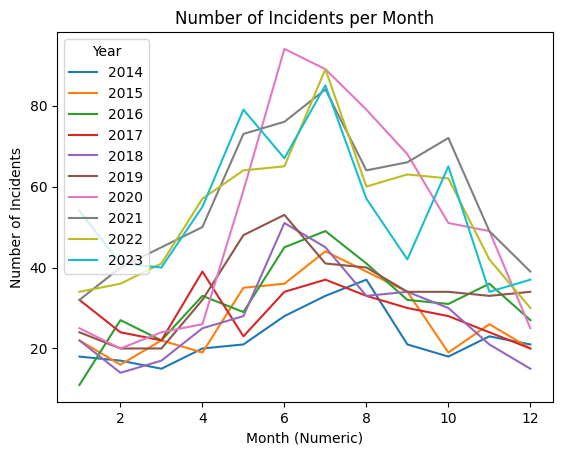

In [13]:
# map out all individual years to see the general peaks of incidents
# seperate the data into different years
# count up the incidents per month
year_2014 = shootings[shootings['Year'] == 2014]['Month'].value_counts().sort_index()
year_2015 = shootings[shootings['Year'] == 2015]['Month'].value_counts().sort_index()
year_2016 = shootings[shootings['Year'] == 2016]['Month'].value_counts().sort_index()
year_2017 = shootings[shootings['Year'] == 2017]['Month'].value_counts().sort_index()
year_2018 = shootings[shootings['Year'] == 2018]['Month'].value_counts().sort_index()
year_2019 = shootings[shootings['Year'] == 2019]['Month'].value_counts().sort_index()
year_2020 = shootings[shootings['Year'] == 2020]['Month'].value_counts().sort_index()
year_2021 = shootings[shootings['Year'] == 2021]['Month'].value_counts().sort_index()
year_2022 = shootings[shootings['Year'] == 2022]['Month'].value_counts().sort_index()
year_2023 = shootings[shootings['Year'] == 2023]['Month'].value_counts().sort_index()

# set up the subplots
fig, ax = plt.subplots()

# plot all the data
ax.plot(year_2014, label='2014')
ax.plot(year_2015, label='2015')
ax.plot(year_2016, label='2016')
ax.plot(year_2017, label='2017')
ax.plot(year_2018, label='2018')
ax.plot(year_2019, label='2019')
ax.plot(year_2020, label='2020')
ax.plot(year_2021, label='2021')
ax.plot(year_2022, label='2022')
ax.plot(year_2023, label='2023')

# configure plot settings
ax.set_title("Number of Incidents per Month")
ax.set_xlabel("Month (Numeric)")
ax.set_ylabel("Number of Incidents")
ax.legend(title="Year")

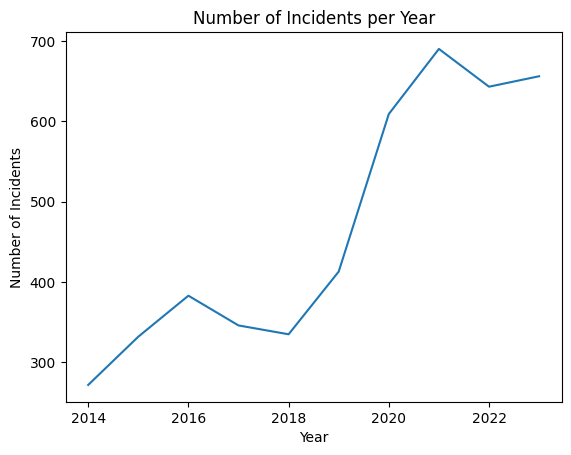

In [14]:
plt.plot(shootings['Year'].value_counts().sort_index())

# configure plot settings
plt.title("Number of Incidents per Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()

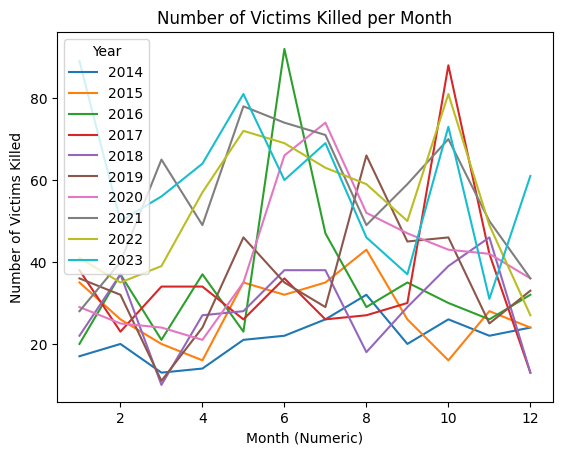

In [15]:
# map out all individual years to see the general peaks of incidents
# seperate the data into different years
# count up the incidents per month
year_2014 = shootings[shootings['Year'] == 2014].groupby(['Month'])['Victims_Killed'].sum().sort_index()
year_2015 = shootings[shootings['Year'] == 2015].groupby(['Month'])['Victims_Killed'].sum().sort_index()
year_2016 = shootings[shootings['Year'] == 2016].groupby(['Month'])['Victims_Killed'].sum().sort_index()
year_2017 = shootings[shootings['Year'] == 2017].groupby(['Month'])['Victims_Killed'].sum().sort_index()
year_2018 = shootings[shootings['Year'] == 2018].groupby(['Month'])['Victims_Killed'].sum().sort_index()
year_2019 = shootings[shootings['Year'] == 2019].groupby(['Month'])['Victims_Killed'].sum().sort_index()
year_2020 = shootings[shootings['Year'] == 2020].groupby(['Month'])['Victims_Killed'].sum().sort_index()
year_2021 = shootings[shootings['Year'] == 2021].groupby(['Month'])['Victims_Killed'].sum().sort_index()
year_2022 = shootings[shootings['Year'] == 2022].groupby(['Month'])['Victims_Killed'].sum().sort_index()
year_2023 = shootings[shootings['Year'] == 2023].groupby(['Month'])['Victims_Killed'].sum().sort_index()

# set up the subplots
fig, ax = plt.subplots()

# plot all the data
ax.plot(year_2014, label='2014')
ax.plot(year_2015, label='2015')
ax.plot(year_2016, label='2016')
ax.plot(year_2017, label='2017')
ax.plot(year_2018, label='2018')
ax.plot(year_2019, label='2019')
ax.plot(year_2020, label='2020')
ax.plot(year_2021, label='2021')
ax.plot(year_2022, label='2022')
ax.plot(year_2023, label='2023')

# configure plot settings
ax.set_title("Number of Victims Killed per Month")
ax.set_xlabel("Month (Numeric)")
ax.set_ylabel("Number of Victims Killed")
ax.legend(title="Year")

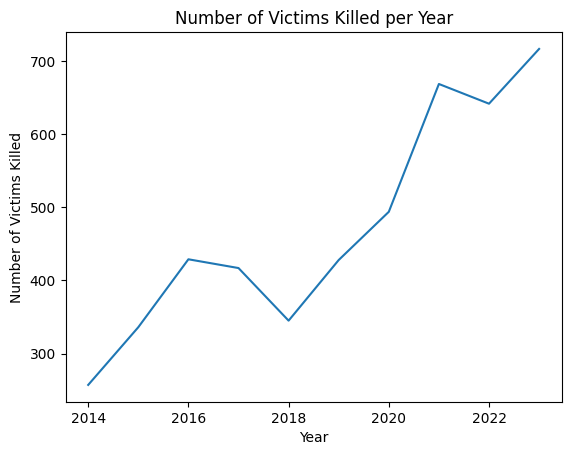

In [16]:
plt.plot(shootings.groupby(['Year'])['Victims_Killed'].sum().sort_index())

# configure plot settings
plt.title("Number of Victims Killed per Year")
plt.xlabel("Year")
plt.ylabel("Number of Victims Killed")
plt.show()

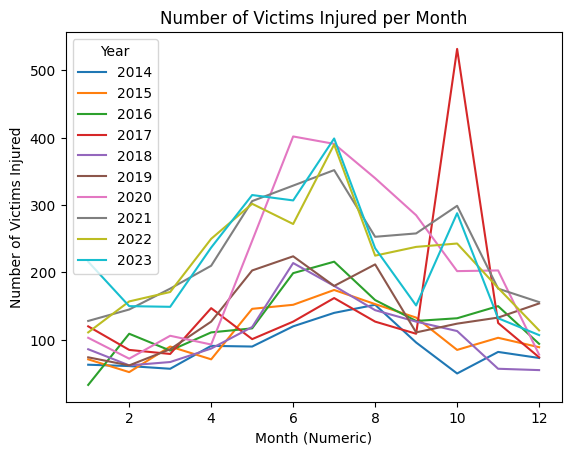

In [17]:
# map out all individual years to see the general peaks of incidents
# seperate the data into different years
# count up the incidents per month
year_2014 = shootings[shootings['Year'] == 2014].groupby(['Month'])['Victims_Injured'].sum().sort_index()
year_2015 = shootings[shootings['Year'] == 2015].groupby(['Month'])['Victims_Injured'].sum().sort_index()
year_2016 = shootings[shootings['Year'] == 2016].groupby(['Month'])['Victims_Injured'].sum().sort_index()
year_2017 = shootings[shootings['Year'] == 2017].groupby(['Month'])['Victims_Injured'].sum().sort_index()
year_2018 = shootings[shootings['Year'] == 2018].groupby(['Month'])['Victims_Injured'].sum().sort_index()
year_2019 = shootings[shootings['Year'] == 2019].groupby(['Month'])['Victims_Injured'].sum().sort_index()
year_2020 = shootings[shootings['Year'] == 2020].groupby(['Month'])['Victims_Injured'].sum().sort_index()
year_2021 = shootings[shootings['Year'] == 2021].groupby(['Month'])['Victims_Injured'].sum().sort_index()
year_2022 = shootings[shootings['Year'] == 2022].groupby(['Month'])['Victims_Injured'].sum().sort_index()
year_2023 = shootings[shootings['Year'] == 2023].groupby(['Month'])['Victims_Injured'].sum().sort_index()

# set up the subplots
fig, ax = plt.subplots()

# plot all the data
ax.plot(year_2014, label='2014')
ax.plot(year_2015, label='2015')
ax.plot(year_2016, label='2016')
ax.plot(year_2017, label='2017')
ax.plot(year_2018, label='2018')
ax.plot(year_2019, label='2019')
ax.plot(year_2020, label='2020')
ax.plot(year_2021, label='2021')
ax.plot(year_2022, label='2022')
ax.plot(year_2023, label='2023')

# configure plot settings
ax.set_title("Number of Victims Injured per Month")
ax.set_xlabel("Month (Numeric)")
ax.set_ylabel("Number of Victims Injured")
ax.legend(title="Year")

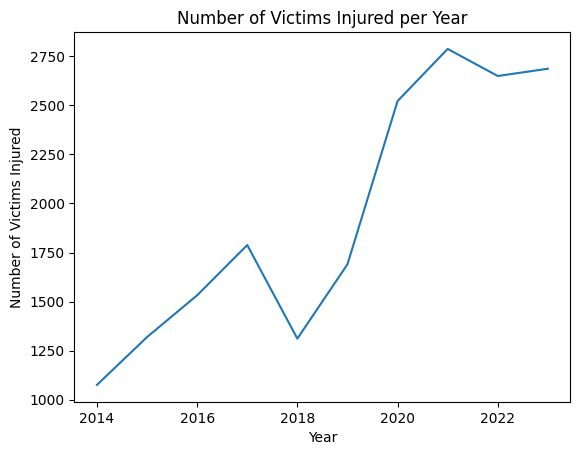

In [18]:
plt.plot(shootings.groupby(['Year'])['Victims_Injured'].sum().sort_index())

# configure plot settings
plt.title("Number of Victims Injured per Year")
plt.xlabel("Year")
plt.ylabel("Number of Victims Injured")
plt.show()

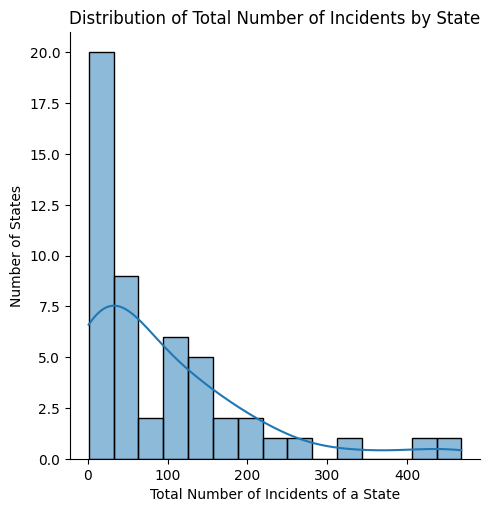

In [19]:
# count the occurence of a state name appearing in an incident row
state_distribution = shootings['State_Name'].value_counts()

#create histogram with density curve overlaid
sns.displot(state_distribution, kde=True, bins=15).set(title="Distribution of Total Number of Incidents by State", 
                                                       xlabel="Total Number of Incidents of a State", 
                                                       ylabel="Number of States")



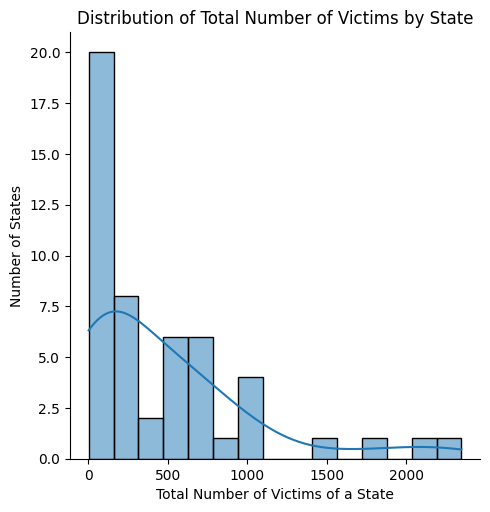

In [20]:
# sum up the total number of victims by state
state_distribution = shootings.groupby(['State_Name'])['Total_Victims'].sum()

#create histogram with density curve overlaid
sns.displot(state_distribution, kde=True, bins=15).set(title="Distribution of Total Number of Victims by State", 
                                                       xlabel="Total Number of Victims of a State", 
                                                       ylabel="Number of States")

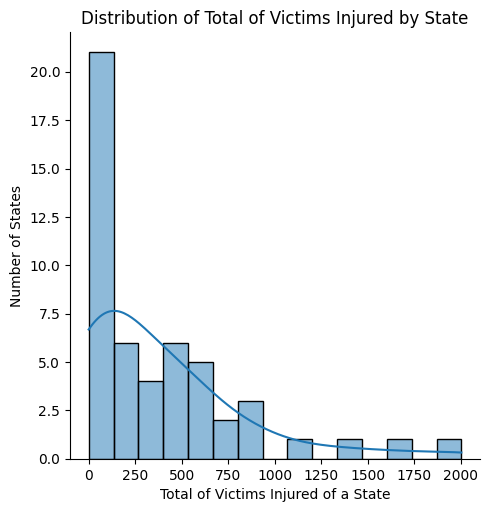

In [21]:
# sum up the total number of victims by state
state_distribution = shootings.groupby(['State_Name'])['Victims_Injured'].sum()

#create histogram with density curve overlaid
sns.displot(state_distribution, kde=True, bins=15).set(title="Distribution of Total of Victims Injured by State", 
                                                       xlabel="Total of Victims Injured of a State", 
                                                       ylabel="Number of States")

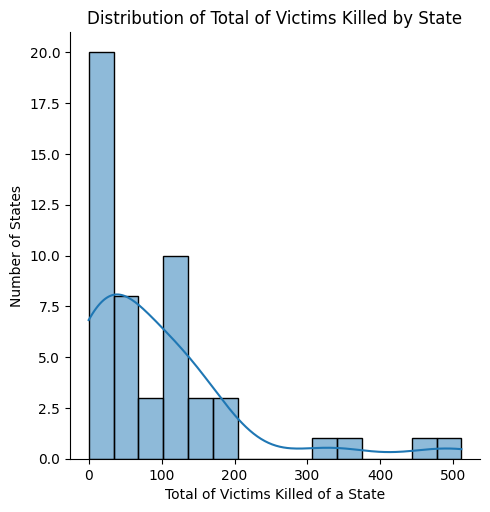

In [22]:
# sum up the total number of victims by state
state_distribution = shootings.groupby(['State_Name'])['Victims_Killed'].sum()

#create histogram with density curve overlaid
sns.displot(state_distribution, kde=True, bins=15).set(title="Distribution of Total of Victims Killed by State", 
                                                       xlabel="Total of Victims Killed of a State", 
                                                       ylabel="Number of States")

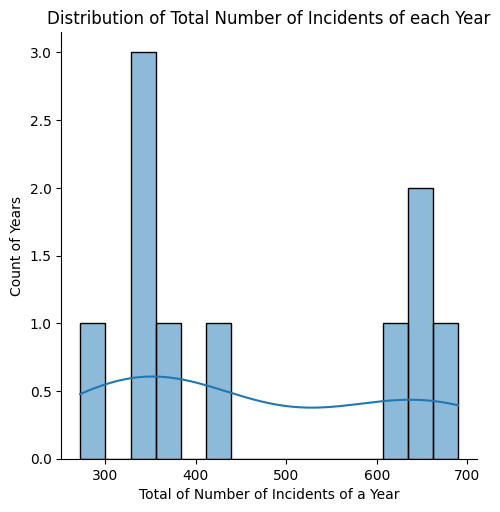

In [29]:
# sum up the total number of victims by state
state_distribution = shootings.groupby(['Year'])['Incident_ID'].count()
state_distribution


#create histogram with density curve overlaid
sns.displot(state_distribution, kde=True, bins=15).set(title="Distribution of Total Number of Incidents of each Year", 
                                                       xlabel="Total of Number of Incidents of a Year", 
                                                       ylabel="Count of Years")

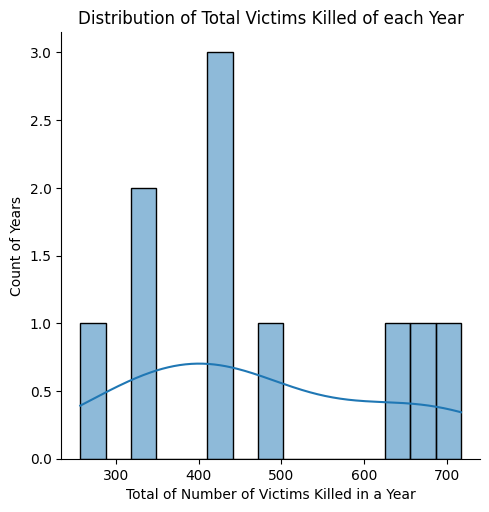

In [32]:
# sum up the total number of victims by state
state_distribution = shootings.groupby(['Year'])['Victims_Killed'].sum()
state_distribution


#create histogram with density curve overlaid
sns.displot(state_distribution, kde=True, bins=15).set(title="Distribution of Total Victims Killed of each Year", 
                                                       xlabel="Total of Number of Victims Killed in a Year", 
                                                       ylabel="Count of Years")

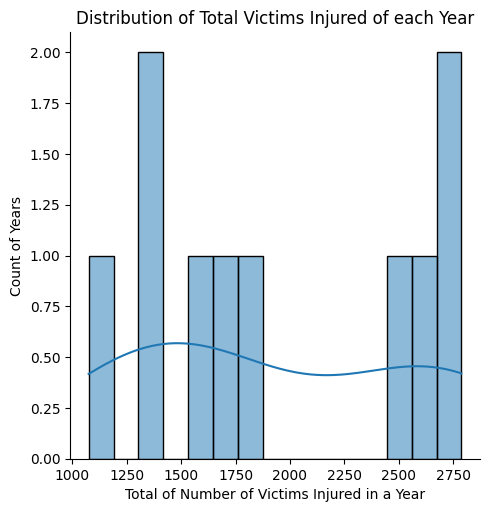

In [33]:
# sum up the total number of victims by state
state_distribution = shootings.groupby(['Year'])['Victims_Injured'].sum()
state_distribution


#create histogram with density curve overlaid
sns.displot(state_distribution, kde=True, bins=15).set(title="Distribution of Total Victims Injured of each Year", 
                                                       xlabel="Total of Number of Victims Injured in a Year", 
                                                       ylabel="Count of Years")